In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

c:\Users\beatr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the simulation results from the JSON file
with open('case_study_servers.json', 'r') as file:
    data = json.load(file)

In [3]:
# Create empty dictionary to store counts
counts = {}

# Iterate over the data and count values in each interval
for value in data["people_leaving_queue"]:
    interval = round(value / 3500) *3500  # Determine the interval
    if interval in counts:
        counts[interval] += 1
    else:
        counts[interval] = 1

# Print the counts
for interval, count in counts.items():
    print(f"Interval: {interval}-{interval+3499}, Count: {count}")

# Extract intervals and counts for plotting
intervals = list(counts.keys())
counts_values = list(counts.values())

Interval: 0-3499, Count: 52
Interval: 3500-6999, Count: 117
Interval: 7000-10499, Count: 115
Interval: 10500-13999, Count: 118
Interval: 14000-17499, Count: 117
Interval: 17500-20999, Count: 119
Interval: 21000-24499, Count: 113
Interval: 24500-27999, Count: 122
Interval: 28000-31499, Count: 115
Interval: 31500-34999, Count: 89
Interval: 35000-38499, Count: 66
Interval: 38500-41999, Count: 64
Interval: 42000-45499, Count: 68
Interval: 45500-48999, Count: 52
Interval: 49000-52499, Count: 72
Interval: 52500-55999, Count: 59
Interval: 56000-59499, Count: 56
Interval: 59500-62999, Count: 70
Interval: 63000-66499, Count: 67
Interval: 66500-69999, Count: 41
Interval: 70000-73499, Count: 60
Interval: 73500-76999, Count: 48
Interval: 77000-80499, Count: 52
Interval: 80500-83999, Count: 63
Interval: 84000-87499, Count: 20


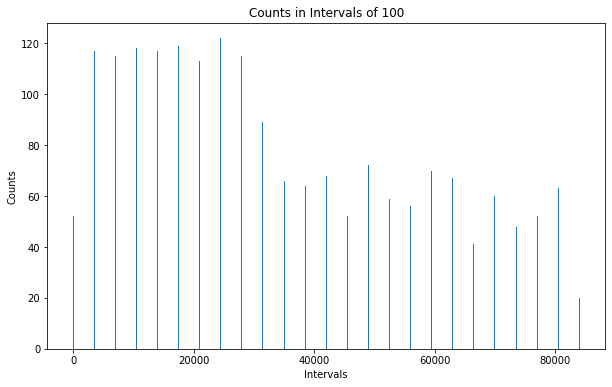

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(intervals, counts_values, width=168)  # Adjust width and alignment as needed
plt.xlabel('Intervals')
plt.ylabel('Counts')
plt.title('Counts in Intervals of 100')
plt.show()

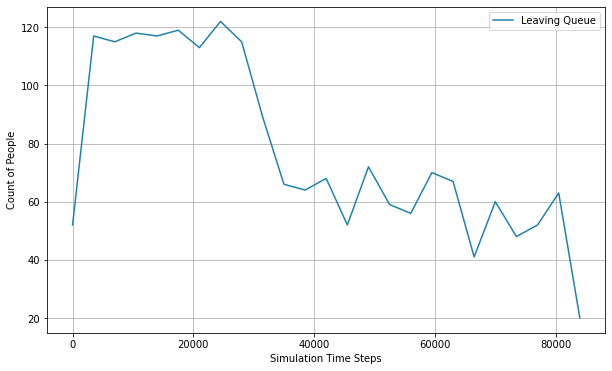

In [5]:
data = {'Intervals': list(counts.keys()), 'Counts': list(counts.values())}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Intervals', y='Counts', label='Leaving Queue', color='#1f82ab')
#plt.title('Counts in Intervals of 500s')
plt.xlabel('Simulation Time Steps')
plt.ylabel('Count of People')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
prev_value = data["people_leaving_queue"][0]
differences = []

for value in data["people_leaving_queue"][1:]:
    differences.append(value - prev_value)
    prev_value = value

plt.plot(differences)
plt.title('Difference between consecutive data points')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.show()


KeyError: 'people_leaving_queue'

In [ ]:
# THIS LOADS THE RIGHT DATA IN THE RIGHT SHAPE
simulation_mean_df = pd.read_json('case_study_servers.json')
simulation_mean_df = simulation_mean_df.iloc[0:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()

Number of rows: 5000
Number of columns: 1


,waiting_times_per_server
0,0.022894
1,0.326285
2,0.437798
3,0.291767
4,0.416839


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=simulation_mean_df, x='time', y='waiting_times_per_server', label='Leaving Queue', color='#1f82ab')
plt.xlabel('Time')
plt.ylabel('Count of People')
plt.title('Queue Dynamics Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'simulation_mean_df' is not defined

<Figure size 720x432 with 0 Axes>